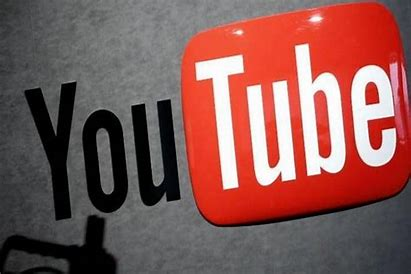

# Introduction:
This project aims to predict the behavior of the video that is going to be uploaded to YouTube. An equation is developed to manually classify all the videos into four groups: overwhelming praise , neutral videos , overwhelming bad , non- popular.

# Data Description:

The dataset that we will use is obtained from Kaggle here. It contains data about trending videos for many countries. Here we will analyze USA and Canda trending videos.
Initial Column Observations:
video_id: contains alphanumeric code for video identification. However, this is not helpful for our data exploration/analysis
trending_date: contains the date the video started trending in YYDDMM format
title: contains the title of the video. 
channel_title: contains the title of the channel
category_id: contains the id number for each category. We will need to match the id number to its corresponding category name
publish_time: contains the date and time the video was published. It is formatted differently from trending date, which we plan to clean
tags: contains the tags in one long string, which we will need to separate into a list
views, likes, dislikes, comment_count: contains numerical values
thumbnail_link: contains url for picture of the thumbnail.
comments_disabled, ratings_disabled, video_error_or_removed: contains boolean values
description: contains the video description as a string. Some contain non-ascii characters, emojis, and urls which we will need to remove if we use

# Algorithms:
- Import necessary libraries and read data set.
- Convert some rows into more than one type.
- Added a new feature to calculating the number of days between publishing the video and when it becomes trend.
- Data Analysis and Visualization.
- Data cleaning.
- Check null values.
- Check duplicated values.
- Describtion of numerical columns.
- Evaluation metrics  is: Recall.
- Use more than one modal to choose the best degree.

# We start with a video that clearly explains the idea of the project.

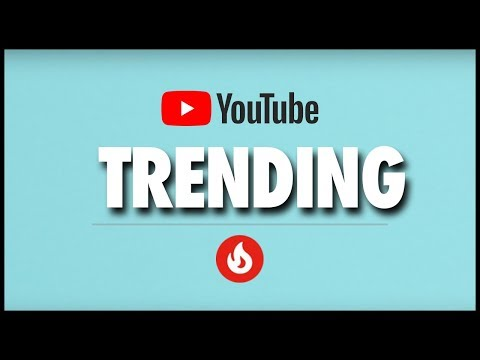

In [1]:
from IPython.display import YouTubeVideo
 
youtube_video = YouTubeVideo('GZmGmkOJ9ME') 
 
display(youtube_video)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import pickle
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from scipy.stats import ttest_ind, chisquare, normaltest
import re
import nltk
from nltk.corpus import stopwords
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries and read data set

In [4]:
df =pd.read_csv('USvideos.csv')

In [5]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [6]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [7]:
df['country'] = 'USA'

In [8]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA


In [9]:
df1 =pd.read_csv('CAvideos.csv')

In [10]:
df1

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [11]:
df1.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [12]:
df1['country'] = 'CAN'

In [13]:
df1.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CAN
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CAN


# We merged America with Canada.

In [14]:
frames = [df, df1]

In [15]:
video = pd.concat(frames)

In [16]:
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,CAN
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,CAN
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,CAN
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,CAN


In [17]:
video.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country'],
      dtype='object')

In [18]:
video.shape

(81830, 17)

In [19]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81830 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                81830 non-null  object
 1   trending_date           81830 non-null  object
 2   title                   81830 non-null  object
 3   channel_title           81830 non-null  object
 4   category_id             81830 non-null  int64 
 5   publish_time            81830 non-null  object
 6   tags                    81830 non-null  object
 7   views                   81830 non-null  int64 
 8   likes                   81830 non-null  int64 
 9   dislikes                81830 non-null  int64 
 10  comment_count           81830 non-null  int64 
 11  thumbnail_link          81830 non-null  object
 12  comments_disabled       81830 non-null  bool  
 13  ratings_disabled        81830 non-null  bool  
 14  video_error_or_removed  81830 non-null  bool  
 15  de

In [20]:
video['publish_time'] = pd.to_datetime(video['publish_time']
                                       , errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [21]:
video.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA


In [22]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81830 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                81830 non-null  object        
 1   trending_date           81830 non-null  object        
 2   title                   81830 non-null  object        
 3   channel_title           81830 non-null  object        
 4   category_id             81830 non-null  int64         
 5   publish_time            81830 non-null  datetime64[ns]
 6   tags                    81830 non-null  object        
 7   views                   81830 non-null  int64         
 8   likes                   81830 non-null  int64         
 9   dislikes                81830 non-null  int64         
 10  comment_count           81830 non-null  int64         
 11  thumbnail_link          81830 non-null  object        
 12  comments_disabled       81830 non-null  bool  

In [23]:
video['trending_date'] = video['trending_date'].astype('str') 
date_pieces = (video['trending_date']
                   .str.split('.'))
video['trending_Year'] = date_pieces.str[0].astype(int)
video['trending_Day'] = date_pieces.str[1].astype(int)
video['trending_Month'] = date_pieces.str[2].astype(int)

In [24]:
video.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_Year,trending_Day,trending_Month
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA,17,14,11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA,17,14,11


In [25]:
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_Year,trending_Day,trending_Month
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA,17,14,11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA,17,14,11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,USA,17,14,11
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,USA,17,14,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,USA,17,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,CAN,18,14,6
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,CAN,18,14,6
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,CAN,18,14,6
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,CAN,18,14,6


In [26]:
video['publish_hour']=video['publish_time'].dt.hour

In [27]:
video['publish_day']=video['publish_time'].dt.day

In [28]:
video['publish_year']=video['publish_time'].dt.year

In [29]:
video['publish_Month']=video['publish_time'].dt.month

In [30]:
video['score'] = ((video.comment_count / video.views)*(video.likes-(1.5 * video.dislikes)))

In [31]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81830 entries, 0 to 40880
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                81830 non-null  object        
 1   trending_date           81830 non-null  object        
 2   title                   81830 non-null  object        
 3   channel_title           81830 non-null  object        
 4   category_id             81830 non-null  int64         
 5   publish_time            81830 non-null  datetime64[ns]
 6   tags                    81830 non-null  object        
 7   views                   81830 non-null  int64         
 8   likes                   81830 non-null  int64         
 9   dislikes                81830 non-null  int64         
 10  comment_count           81830 non-null  int64         
 11  thumbnail_link          81830 non-null  object        
 12  comments_disabled       81830 non-null  bool  

In [32]:
conditions = [
    (video['views'] >= 100000) & (video['score'] >= 300),#y3
    (video['views'] >= 100000) & (video['score'].between(0,300)),#y2
    (video['views'] >= 100000) & (video['score'] < 0), #y1
    ((video['views'] < 100000))#y0
   ]
values = ['overwhelming praise','neutral videos','overwhelming bad','non- popula']     
video['video_type'] = np.select(conditions,values)

In [33]:
conditions1 = [
    (video['video_type'] == "overwhelming praise"),
    (video['video_type'] == "neutral videos"),
    (video['video_type'] == "overwhelming bad"),
    (video['video_type'] == "non- popula")
   ]
values1 = ['3','2','1','0']  
video['video_type_no'] = np.select(conditions1,values1)

In [34]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81830 entries, 0 to 40880
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                81830 non-null  object        
 1   trending_date           81830 non-null  object        
 2   title                   81830 non-null  object        
 3   channel_title           81830 non-null  object        
 4   category_id             81830 non-null  int64         
 5   publish_time            81830 non-null  datetime64[ns]
 6   tags                    81830 non-null  object        
 7   views                   81830 non-null  int64         
 8   likes                   81830 non-null  int64         
 9   dislikes                81830 non-null  int64         
 10  comment_count           81830 non-null  int64         
 11  thumbnail_link          81830 non-null  object        
 12  comments_disabled       81830 non-null  bool  

In [35]:
video['video_type_no'].value_counts()

2    54758
3    13699
0    12441
1      932
Name: video_type_no, dtype: int64

In [36]:
video 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_Year,trending_Day,trending_Month,publish_hour,publish_day,publish_year,publish_Month,score,video_type,video_type_no
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,17,14,11,17,13,2017,11,1131.528370,overwhelming praise,3
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,17,14,11,7,13,2017,11,461.981128,overwhelming praise,3
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,17,14,11,19,12,2017,11,353.815380,overwhelming praise,3
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,17,14,11,11,13,2017,11,57.363326,neutral videos,2
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,17,14,11,18,12,2017,11,1080.400002,overwhelming praise,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,...,18,14,6,18,13,2018,6,25.244841,non- popula,0
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,...,18,14,6,19,13,2018,6,0.178161,neutral videos,2
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,...,18,14,6,17,11,2018,6,128.291548,neutral videos,2
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,...,18,14,6,4,13,2018,6,26.728783,neutral videos,2


# Data Analysis and Visualization

 What is the most watched channel?

In [37]:
top_10_channel = video["channel_title"].value_counts() 
top_10_channel.head(10)

CNN                                       362
The Late Show with Stephen Colbert        359
ESPN                                      344
TheEllenShow                              343
FBE                                       337
The Tonight Show Starring Jimmy Fallon    334
Late Night with Seth Meyers               331
Jimmy Kimmel Live                         330
BuzzFeedVideo                             329
Vox                                       326
Name: channel_title, dtype: int64

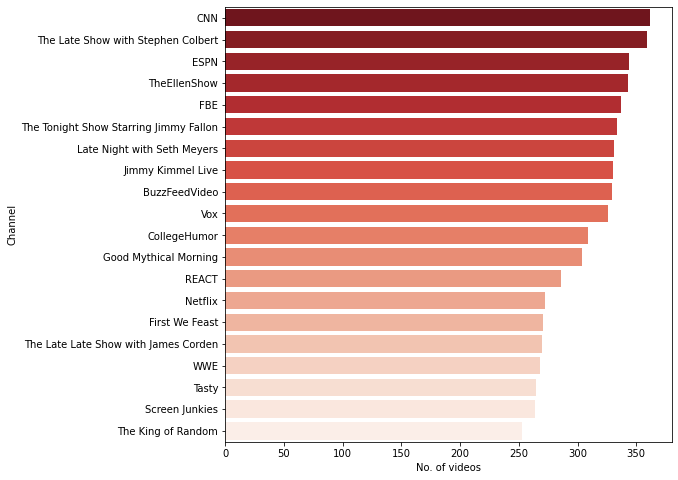

In [38]:
cdf = video.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
ch_ = sns.barplot(x="video_count", y="channel_title", data=cdf,palette=('Reds_r'), ax=ax)
ch_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [39]:
rep_channel = video.groupby('channel_title')[['views']].sum().reset_index()
rep_channel.sort_values(by='views',inplace=True,ascending=False)

<Figure size 432x288 with 0 Axes>

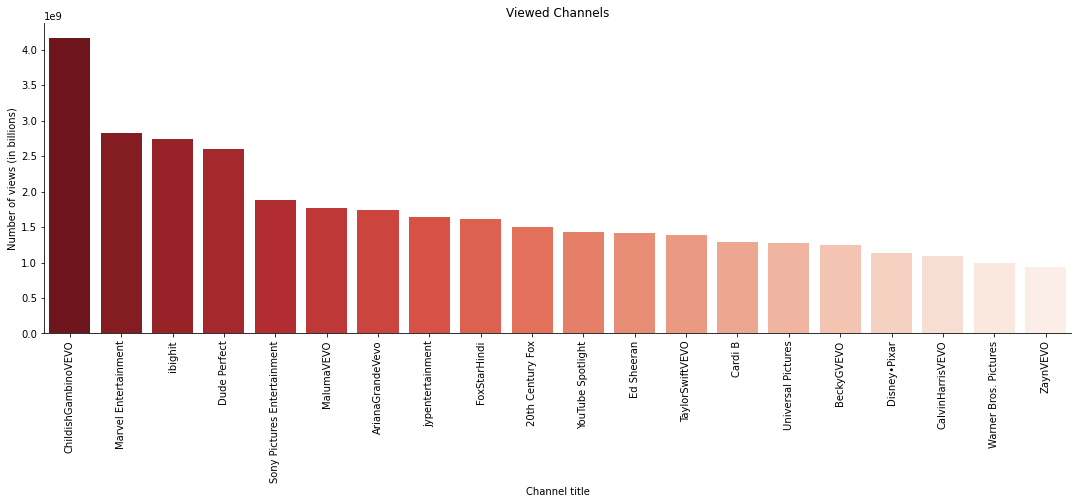

In [40]:
plt.clf()
channel_views = rep_channel.head(20)
sns.catplot(x='channel_title',y='views',data=channel_views,kind='bar', palette=('Reds_r'),aspect=3)
plt.xticks(rotation=90)
plt.xlabel('Channel title')
plt.ylabel('Number of views (in billions)')
plt.title('Viewed Channels')
plt.show()

In [41]:
channel_df = video.groupby(video['channel_title']).agg({'likes': ['sum'],
                                                           'dislikes': ['sum'],
                                                           'views': ['sum']})
channel_df.columns = ['likes', 'dislikes', 'views']

channel_df.sort_values(by=["dislikes"], ascending=False).head(10)

,likes,dislikes,views
channel_title,,,
YouTube Spotlight,37052919,19822612,1427365245
Logan Paul Vlogs,51137633,16301147,726829659
ChildishGambinoVEVO,111294734,6744382,4170263834
Call of Duty,13265756,6131935,356061575
Jake Paul,11971490,5868724,285300076
ibighit,249506995,4380237,2747474597
TaylorSwiftVEVO,57563971,3090327,1385634287
jypentertainment,51522885,2871396,1641707189
ArianaGrandeVevo,61867438,2250200,1737774086


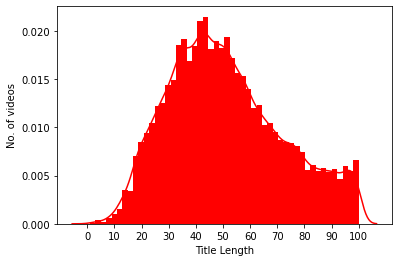

In [42]:
video["title_length"] = video["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
title_len = sns.distplot(video["title_length"], kde=True, rug=False, hist_kws={'alpha': 1}, color='Red',ax=ax)
title_len = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

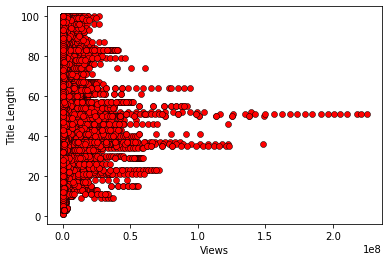

In [43]:
fig, ax = plt.subplots()
number_views= ax.scatter(x=video['views'], y=video['title_length'],color='Red', edgecolors="#000000", linewidths=0.5)
number_views = ax.set(xlabel="Views", ylabel="Title Length")

In [44]:
video.trending_Year.value_counts()

18    62638
17    19192
Name: trending_Year, dtype: int64

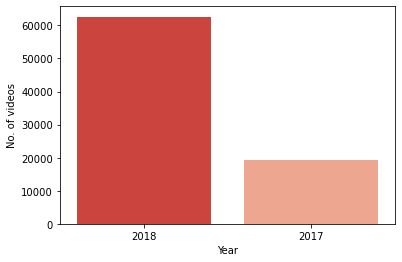

In [45]:
most_year_views= video["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
td_ = sns.barplot(x="year", y="No_of_videos", data=most_year_views, 
                palette=('Reds_r'), ax=ax)
td_ = ax.set(xlabel="Year", ylabel="No. of videos")

Add some columns for calculate day between publish day and trending date

In [46]:
video['publish_date'] = video['publish_year'].astype(str)+'.'+video['publish_day'].astype(str)+'.'+video['publish_Month'].astype(str)

In [47]:
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_Month,publish_hour,publish_day,publish_year,publish_Month,score,video_type,video_type_no,title_length,publish_date
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,11,17,13,2017,11,1131.528370,overwhelming praise,3,34,2017.13.11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,11,7,13,2017,11,461.981128,overwhelming praise,3,62,2017.13.11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,11,19,12,2017,11,353.815380,overwhelming praise,3,53,2017.12.11
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,11,11,13,2017,11,57.363326,neutral videos,2,32,2017.13.11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,11,18,12,2017,11,1080.400002,overwhelming praise,3,24,2017.12.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,...,6,18,13,2018,6,25.244841,non- popula,0,28,2018.13.6
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,...,6,19,13,2018,6,0.178161,neutral videos,2,32,2018.13.6
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,...,6,17,11,2018,6,128.291548,neutral videos,2,57,2018.11.6
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,...,6,4,13,2018,6,26.728783,neutral videos,2,32,2018.13.6


In [48]:
video['trending_date']= pd.to_datetime(video['trending_date'],format="%y.%d.%m")

In [49]:
video.trending_date.unique

<bound method Series.unique of 0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40876   2018-06-14
40877   2018-06-14
40878   2018-06-14
40879   2018-06-14
40880   2018-06-14
Name: trending_date, Length: 81830, dtype: datetime64[ns]>

In [50]:
video['publish_date']= pd.to_datetime(video['publish_date'],format="%Y.%d.%m")

In [51]:
video.publish_date.unique

<bound method Series.unique of 0       2017-11-13
1       2017-11-13
2       2017-11-12
3       2017-11-13
4       2017-11-12
           ...    
40876   2018-06-13
40877   2018-06-13
40878   2018-06-11
40879   2018-06-13
40880   2018-06-13
Name: publish_date, Length: 81830, dtype: datetime64[ns]>

In [52]:
video['Difference_day'] = video['trending_date'] - video['publish_date']

In [53]:
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,publish_hour,publish_day,publish_year,publish_Month,score,video_type,video_type_no,title_length,publish_date,Difference_day
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,17,13,2017,11,1131.528370,overwhelming praise,3,34,2017-11-13,1 days
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,7,13,2017,11,461.981128,overwhelming praise,3,62,2017-11-13,1 days
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,19,12,2017,11,353.815380,overwhelming praise,3,53,2017-11-12,2 days
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,11,13,2017,11,57.363326,neutral videos,2,32,2017-11-13,1 days
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,18,12,2017,11,1080.400002,overwhelming praise,3,24,2017-11-12,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,...,18,13,2018,6,25.244841,non- popula,0,28,2018-06-13,1 days
40877,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,...,19,13,2018,6,0.178161,neutral videos,2,32,2018-06-13,1 days
40878,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,...,17,11,2018,6,128.291548,neutral videos,2,57,2018-06-11,3 days
40879,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,...,4,13,2018,6,26.728783,neutral videos,2,32,2018-06-13,1 days


In [54]:
video['Difference_day'] = video['Difference_day'].astype(str) 

In [55]:
video.Difference_day = video.Difference_day.str.replace('days','')

In [56]:
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,publish_hour,publish_day,publish_year,publish_Month,score,video_type,video_type_no,title_length,publish_date,Difference_day
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,17,13,2017,11,1131.528370,overwhelming praise,3,34,2017-11-13,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,7,13,2017,11,461.981128,overwhelming praise,3,62,2017-11-13,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,19,12,2017,11,353.815380,overwhelming praise,3,53,2017-11-12,2
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,11,13,2017,11,57.363326,neutral videos,2,32,2017-11-13,1
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,18,12,2017,11,1080.400002,overwhelming praise,3,24,2017-11-12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,...,18,13,2018,6,25.244841,non- popula,0,28,2018-06-13,1
40877,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,...,19,13,2018,6,0.178161,neutral videos,2,32,2018-06-13,1
40878,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,...,17,11,2018,6,128.291548,neutral videos,2,57,2018-06-11,3
40879,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,...,4,13,2018,6,26.728783,neutral videos,2,32,2018-06-13,1


Which country gets the most popular video trend and not trend ?

In [57]:
video['video_type'].value_counts()

neutral videos         54758
overwhelming praise    13699
non- popula            12441
overwhelming bad         932
Name: video_type, dtype: int64

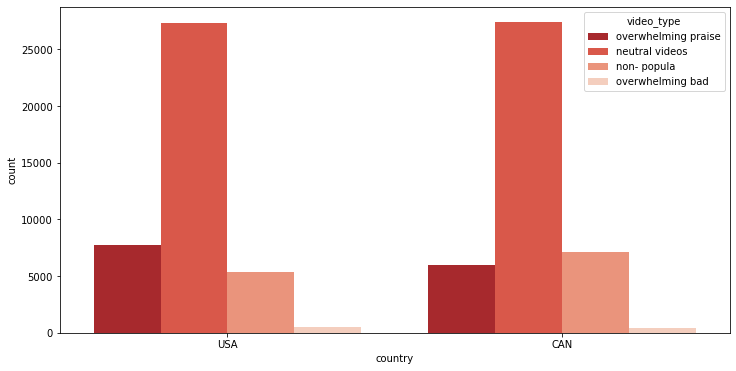

In [58]:
video.groupby(['country', 'video_type'])['views'].sum()
sns.countplot(data = video, x='country', hue='video_type', palette=('Reds_r'))
plt.gcf().set_size_inches(12,6)

Video error or removal ratio?

In [59]:
video["video_error_or_removed"].value_counts()

False    81780
True        50
Name: video_error_or_removed, dtype: int64

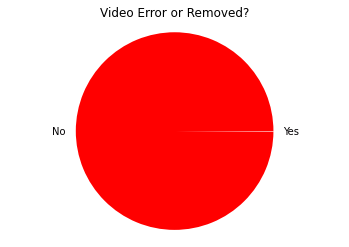

In [60]:
value_counts = video["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
counts= ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#FF0000','#FFFFFF'], textprops={'color': '#040204'})
counts = ax.axis('equal')
counts = ax.set_title('Video Error or Removed?')

 Are comments disabled?

In [61]:
video["comments_disabled"].value_counts(normalize=True)

False    0.98514
True     0.01486
Name: comments_disabled, dtype: float64

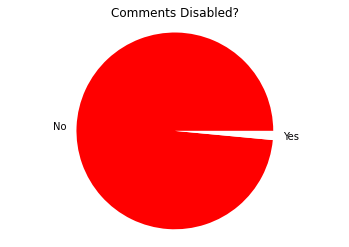

In [62]:
value_counts = video["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
counts_= ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#FF0000','#FFFFFF'], textprops={'color': '#040204'})
counts_= ax.axis('equal')
counts_= ax.set_title('Comments Disabled?')

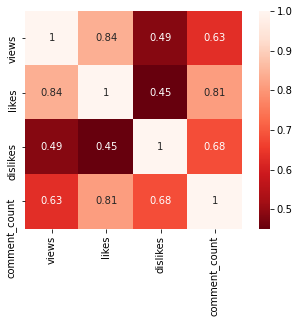

In [63]:
numerical_cols = ['views','likes','dislikes','comment_count']
sns.heatmap(video[numerical_cols].corr(),square=True,annot=True,cmap='Reds_r');

In [64]:
# Create converted rates/ratio columns
video['comment_rate'] = video['comment_count'] / video['views']
video['dislike_rate'] =  video ['dislikes'] / video['views']
video['dislike_ratio'] = video['dislikes'] / (video['dislikes'] + video['likes'])

# Number of Dislikes 

Number of Comments
First we will consider the relationship between the number of dislikes and the number comments, which we will do by creating a scatter plot we observe that most of the data points cluster near the origin with multiple near-linear lines stemming from this cluster. Although we can see a positive correlation between these two variables, it is not in a linear manner, thus this could not be fitted well by a single line, so we need to consider more variables.

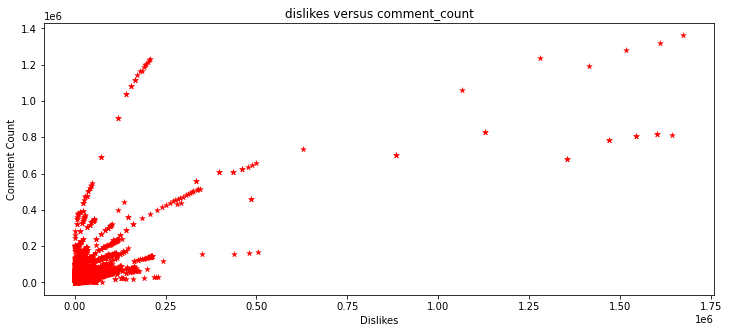

In [65]:
plt.figure(figsize=(12,5))
plt.scatter(video['dislikes'],video['comment_count'],marker='*',
            linewidths=0.3, color='Red')
plt.title("dislikes versus comment_count")
plt.xlabel("Dislikes")
plt.ylabel("Comment Count")
plt.show()

# Dislike Rate - Comment Rate

Now we will consider the relationship between dislike rate and comment rate, as we feel that factoring in views is important for our analysis since the number of views is a major factor for measuring public exposure. In Figure we have a scatter plot with computed data-normalized points with a variable range of [0,1]. There is a cluster of data points at the origin, but there doesn't seem to be a strong correlation between the variables, so we will continue to explore different relationships.

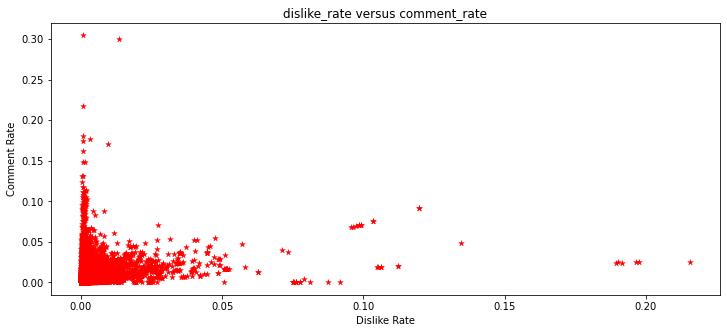

In [66]:
plt.figure(figsize=(12,5))
plt.scatter(video['dislike_rate'],video['comment_rate'],marker='*',linewidths=0.3, 
           color='Red')
plt.title("dislike_rate versus comment_rate")
plt.xlabel("Dislike Rate")
plt.ylabel("Comment Rate")
plt.show()

# Distribution Visualization

Now we will plot the distribution for the comment rate, dislike rate, and dislike ratio to get a feeling for the shape of the distribution

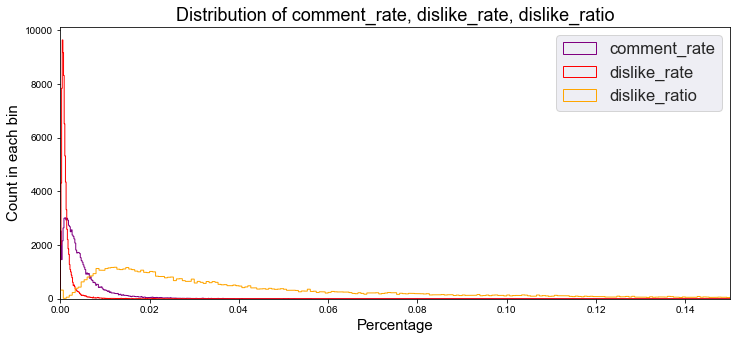

In [67]:
# Plot distribution of comment rate, dislike rate, and dislike ratio
plt.figure(figsize=(12,5))
plt.hist(video['comment_rate'],label='comment_rate',bins=1500,
         color='purple', histtype='step')
plt.hist(video['dislike_rate'],label='dislike_rate',bins=1500,
         color ='Red', histtype='step')
plt.hist(video['dislike_ratio'],label='dislike_ratio',bins=1500,
         color='orange', histtype='step')
plt.title("Distribution of comment_rate, dislike_rate, dislike_ratio", 
         fontsize=18)
sns.set(font_scale=1.5)
plt.xlabel("Percentage", fontsize=15)
plt.ylabel("Count in each bin", fontsize=15)
plt.xlim(0,0.15)
plt.legend()
plt.show()

we observe that the majority of trending videos have both low dislike rates and low comment rates. And we can see that the shape of these two distributions are similar (both right skewed). Now that we have observed the distributions, we will now look for relationships between dislikes and comments. When people dislike a video, do they tend to dissent publicly by leaving a comment, thus increasing a video's engagment?

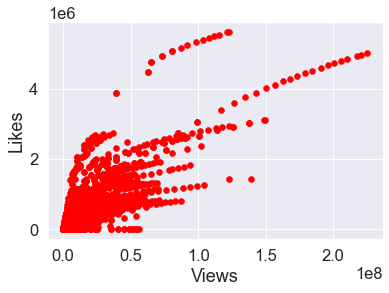

In [68]:
fig, ax = plt.subplots()
show_views = plt.scatter(x=video['views'], y=video['likes'], linewidths=0.5, color='Red')
show_views = ax.set(xlabel="Views", ylabel="Likes")

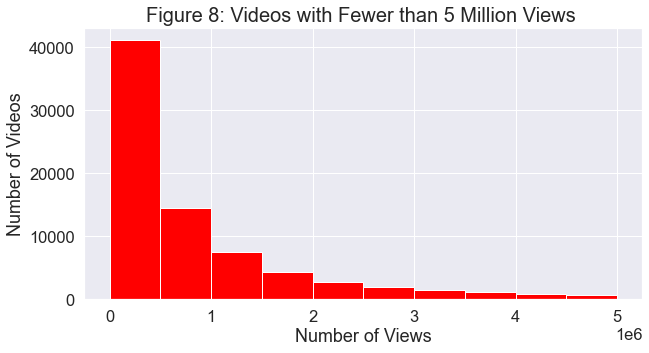

In [69]:
# Subset of views below 5 million
v5million = video[video['views'] < 5e6]['views']

# Histogram of the views data for videos with views below 5 million
plt.figure(figsize=(10,5))
v2 = v5million.hist(color='Red')
plt.xlabel('Number of Views', fontsize=18)
plt.ylabel('Number of Videos', fontsize=18)
plt.title('Figure 8: Videos with Fewer than 5 Million Views ', fontsize=20);

Text(0.5, 1.0, 'Figure 10: Total Likes for Trending Videos Below 20,000 Likes ')

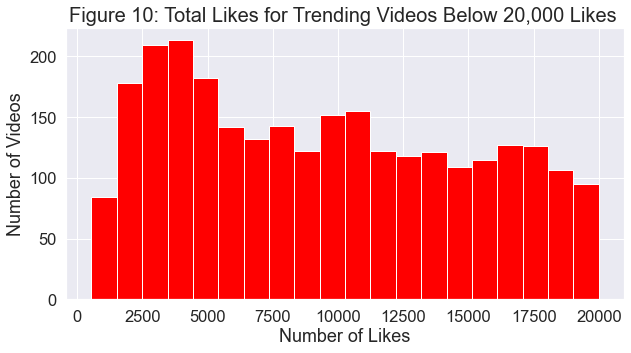

In [70]:
# Subset of likes below 20,000
below20000 = video[video['views'] < 2e4]['views']
plt.figure(figsize=(10,5))
# Histogram of the likes data for videos with likes below 20 thousand
l2 = below20000.hist(bins=20,color='Red')
plt.xlabel('Number of Likes', fontsize=18)
plt.ylabel('Number of Videos', fontsize=18)
plt.title('Figure 10: Total Likes for Trending Videos Below 20,000 Likes ', fontsize=20)

Now it is easy to see that the majority of videos have under 1 million views. We will calculate the exact percentage below

In [71]:
views_2 = video[video['views'] < 2e6]['views'].count() / video['views'].count() * 100
views_1 = video[video['views'] < 1e6]['views'].count() / video['views'].count() * 100

print("% videos with under 2 million views: ", views_2)
print("% videos with under 1 million views: ", views_1)

% videos with under 2 million views:  82.44897959183673
% videos with under 1 million views:  67.95062935353782


In [72]:
# Finding max number of likes
print("max number of likes: ", video['likes'].max())

# Finding min number of likes; excluding videos with 0 likes as those are for videos with ratings disabled
nonzero = video[video['likes'] != 0]
print("min number of likes: ", nonzero['likes'].min())
print()

# Finding number of videos with max and min number of likes
print("num with max: ", len(video[video['likes'] ==video['likes'].max()]['likes']))
print("num with min: ", len(nonzero[nonzero['likes'] == 1]['likes']))

max number of likes:  5613827
min number of likes:  1

num with max:  1
num with min:  9


In [73]:
import calendar

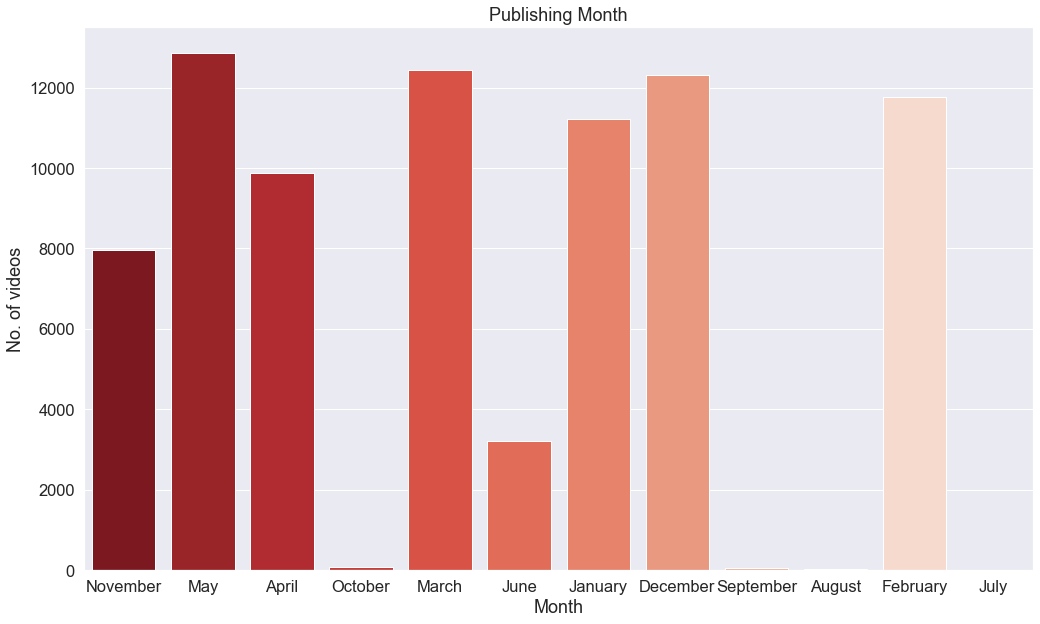

Publishing Month

May          12870
March        12444
December     12303
February     11768
January      11209
April         9883
November      7972
June          3214
October         73
September       49
August          31
July            14
Name: publish_Month, dtype: int64


In [74]:
video['publish_time'] = pd.to_datetime(video['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
video['publish_Month'] = video['publish_time'].dt.month
video['publish_Month'] = video['publish_Month'].apply(lambda x: calendar.month_name[x])
plt.figure(figsize=(17,10))
sns.countplot(video['publish_Month'],  palette=('Reds_r'))
plt.title('Publishing Month')
plt.xlabel('Month')
plt.ylabel('No. of videos')
plt.show()
print("Publishing Month\n")
print(video['publish_Month'].value_counts())

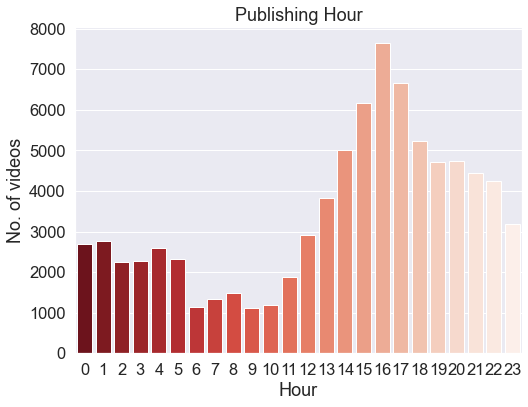

Publishing Hour

16    7658
17    6655
15    6162
18    5236
14    5002
20    4732
19    4728
21    4434
22    4243
13    3835
23    3193
12    2913
1     2759
0     2702
4     2587
5     2315
3     2268
2     2250
11    1879
8     1480
7     1331
10    1201
6     1150
9     1117
Name: publish_hour, dtype: int64


In [75]:
video['publish_hour'] = video['publish_time'].dt.hour
plt.figure(figsize=(8,6))
sns.countplot(video['publish_hour'], palette=('Reds_r'))
plt.title('Publishing Hour')
plt.xlabel('Hour')
plt.ylabel('No. of videos')
plt.show()
print("Publishing Hour\n")
print(video['publish_hour'].value_counts())

# Title Word Choice 

We will start by looking at what words are commonly used in video titles, as we predicted that word choice will be an important factor for Trending videos.

In [76]:
cnt = Counter()

# Finding the occurence of words in video titles
for title in video['title']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

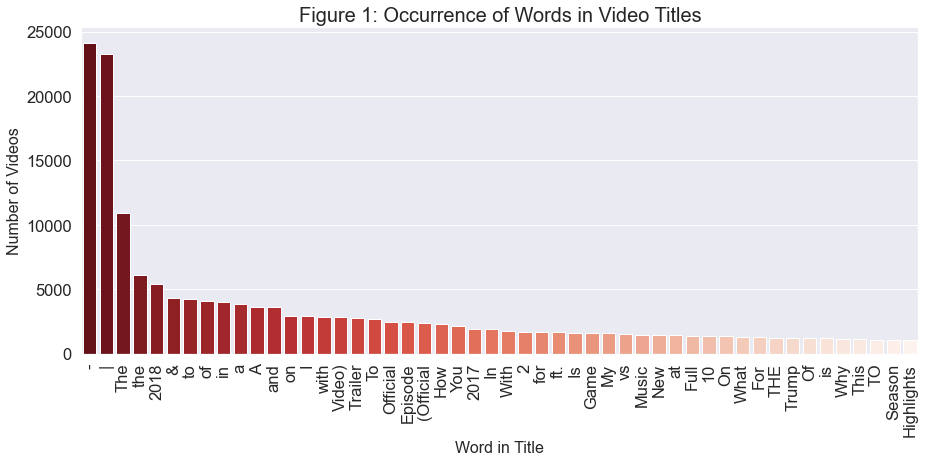

In [77]:
# Graphing occurrence of words in title
fig= plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(top_words, freqs, palette="Reds_r")
sns.set_style("darkgrid")
sns.set(font_scale=1.2)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Figure 1: Occurrence of Words in Video Titles', fontsize=20)
plt.show()

In [78]:
video['tags'] = video['tags'].str.replace('|', '')
video['tags'] = video['tags'].str.replace('"', '')
video['tags_count'] =video['tags'].str.count(' ') + 1

In [79]:
title_words = list(video["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 24118),
 ('|', 23259),
 ('The', 10929),
 ('the', 6108),
 ('2018', 5378),
 ('&', 4310),
 ('to', 4246),
 ('of', 4112),
 ('in', 3973),
 ('a', 3845),
 ('A', 3644),
 ('and', 3616),
 ('on', 2935),
 ('I', 2878),
 ('with', 2855),
 ('Video)', 2827),
 ('Trailer', 2738),
 ('To', 2713),
 ('Official', 2484),
 ('Episode', 2422),
 ('(Official', 2371),
 ('How', 2283),
 ('You', 2143),
 ('2017', 1885),
 ('In', 1873)]

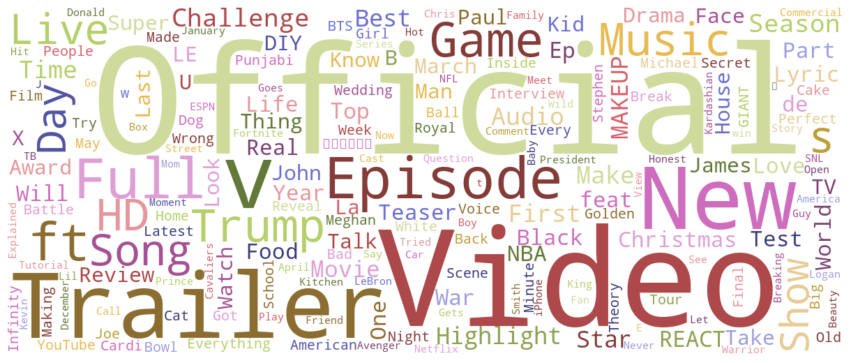

In [80]:
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [81]:
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,score,video_type,video_type_no,title_length,publish_date,Difference_day,comment_rate,dislike_rate,dislike_ratio,tags_count
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,1131.528370,overwhelming praise,3,34,2017-11-13,1,0.021318,0.003963,0.049030,2
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,last week tonight trump presidencylast week to...,2418783,97185,6146,...,461.981128,overwhelming praise,3,62,2017-11-13,1,0.005252,0.002541,0.059479,12
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,racist supermanrudymancusokingbachracistsuperm...,3191434,146033,5339,...,353.815380,overwhelming praise,3,53,2017-11-12,2,0.002563,0.001673,0.035271,19
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,rhett and linkgmmgood mythical morningrhett an...,343168,10172,666,...,57.363326,neutral videos,2,32,2017-11-13,1,0.006253,0.001941,0.061450,34
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,ryanhigahigatvnigahigai dare youidyrhpcdaresno...,2095731,132235,1989,...,1080.400002,overwhelming praise,3,24,2017-11-12,2,0.008359,0.000949,0.014819,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,annoying orangefunnyfruittalkinganimationdaneb...,80685,1701,99,...,25.244841,non- popula,0,28,2018-06-13,1,0.016261,0.001227,0.055000,14
40877,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,hkayet tounsiaelhiwar ettounsidenya okhraoumou...,103339,460,66,...,0.178161,neutral videos,2,32,2018-06-13,1,0.000494,0.000639,0.125475,41
40878,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,Kingdom HeartsKH3Kingdom Hearts 3FrozenSquare ...,773347,25900,224,...,128.291548,neutral videos,2,57,2018-06-11,3,0.005018,0.000290,0.008574,13
40879,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,180612__TB02SorryExcuseNewsPoliticsThe Young T...,115225,2115,182,...,26.728783,neutral videos,2,32,2018-06-13,1,0.014511,0.001580,0.079234,30


# Check null values

In [82]:
video.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1866
country                      0
trending_Year                0
trending_Day                 0
trending_Month               0
publish_hour                 0
publish_day                  0
publish_year                 0
publish_Month                0
score                        0
video_type                   0
video_type_no                0
title_length                 0
publish_date                 0
Difference_day               0
comment_rate                 0
dislike_rate                 0
dislike_

In [83]:
video.describe()

,category_id,views,likes,dislikes,comment_count,trending_Year,trending_Day,trending_Month,publish_hour,publish_day,publish_year,score,title_length,comment_rate,dislike_rate,dislike_ratio,tags_count
count,81830.000000,8.183000e+04,8.183000e+04,8.183000e+04,8.183000e+04,81830.000000,81830.000000,81830.000000,81830.000000,81830.000000,81830.000000,81830.000000,81830.000000,81830.000000,81830.000000,81376.000000,81830.000000
mean,20.383649,1.754415e+06,5.693911e+04,2.861005e+03,6.746303e+03,17.765465,15.855554,5.233521,13.788659,15.852035,2017.733728,311.337429,51.141586,0.005041,0.001469,0.067492,18.341195
std,7.194716,5.785451e+06,1.879156e+05,2.455480e+04,3.060427e+04,0.423710,8.849903,3.825740,6.563316,8.620037,0.537253,1873.842596,21.080640,0.006785,0.003503,0.096521,14.735158
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,17.000000,1.000000,1.000000,0.000000,1.000000,2006.000000,-40225.900887,1.000000,0.000000,0.000000,0.000000,1.000000
25%,17.000000,1.781945e+05,3.301000e+03,1.360000e+02,5.050000e+02,18.000000,8.000000,2.000000,10.000000,8.000000,2017.000000,6.254875,35.000000,0.001605,0.000526,0.016822,6.000000
50%,24.000000,4.961600e+05,1.283400e+04,4.380000e+02,1.550000e+03,18.000000,16.000000,4.000000,15.000000,16.000000,2018.000000,36.262489,48.000000,0.003234,0.000857,0.034108,15.000000
75%,24.000000,1.355388e+06,4.096175e+04,1.421000e+03,4.626000e+03,18.000000,23.000000,6.000000,19.000000,23.000000,2018.000000,158.669419,65.000000,0.006053,0.001469,0.076092,29.000000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,18.000000,31.000000,12.000000,23.000000,31.000000,2018.000000,73473.159904,100.000000,0.304600,0.215580,1.000000,87.000000


# Check duplicated values

In [84]:
video.duplicated().values.any()

True

In [85]:
video.duplicated().sum()

48

In [86]:
video = video.drop_duplicates()
video.shape

(81782, 34)

In [87]:
video.duplicated().values.any()

False

# Evaluation metrics  is: Recall

# Moudel

In [88]:
video_train, video_test = train_test_split(video, test_size=0.2,random_state=0)

In [89]:
video_train.shape

(65425, 34)

In [90]:
video_test.shape

(16357, 34)

In [91]:
X = video_train[['views','likes','dislikes','comment_count']]
y= video_train['video_type_no']

In [92]:
X_test = video_test[['views','likes','dislikes','comment_count']]
y_test = video_test['video_type_no']

In [93]:
print(set(y_test))

{'3', '2', '1', '0'}


In [94]:
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100 
    print(f"Class= {k}, n={v} ({dist}%)")

Class= 3, n=10998 (16.810087886893392%)
Class= 0, n=9952 (15.211310661062285%)
Class= 2, n=43737 (66.85059228123806%)
Class= 1, n=738 (1.1280091708062667%)


<BarContainer object of 4 artists>

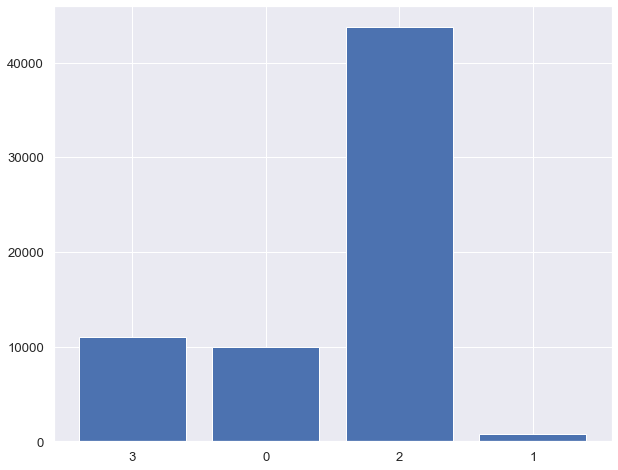

In [95]:
plt.figure(1, figsize=(10,8))
plt.bar(counter.keys(),counter.values())

# Knn

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)
scores3 = []
pre_score3 = []
recall_scor3 = []
kfold = KFold(n_splits=5)

for train_ix, val_ix in kfold.split(X, y):

    train_X, val_X = X.iloc[train_ix], X.iloc[val_ix]
    train_y, val_y = y.iloc[train_ix], y.iloc[val_ix]
    
    
    oversample = SMOTE(random_state = 0)
    train_X, train_y = oversample.fit_resample(train_X, train_y)
    knn.fit(train_X, train_y)
    y_pred =knn.predict(val_X)
    scores3.append(metrics.f1_score(val_y, y_pred, pos_label='3',average='micro'))
    pre_score3.append(metrics.precision_score(val_y, y_pred, pos_label='3',average='micro'))
    recall_scor3.append(metrics.recall_score(val_y, y_pred, pos_label='3',average='micro'))

print("kNN f1 score: \t")
print(sum(scores3) / len(scores3))
print("----------------")
conf_mat3 = confusion_matrix(val_y, y_pred)
print("kNN confusion matrix: \n",conf_mat3)
print("----------------")
print("KNN precision score")
print(sum(pre_score3) / len(pre_score3))
print("----------------")
print("KNN recall_score")
print(sum(recall_scor3) / len(recall_scor3))
print("----------------")

kNN f1 score: 	
0.9389835689721056
----------------
kNN confusion matrix: 
 [[2009    0    0    0]
 [   0  119   25    0]
 [   5  257 8053  372]
 [   0    4  119 2122]]
----------------
KNN precision score
0.9389835689721056
----------------
KNN recall_score
0.9389835689721056
----------------


In [97]:
X_test = video_test[['views','likes','dislikes','comment_count']]
y_test = video_test['video_type_no']

In [98]:
y_pred_test =knn.predict(X_test)
print("kNN f1 score: \t")
print(metrics.f1_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("KNN precision score")
print(metrics.precision_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("KNN recall_score")
print((metrics.recall_score(y_test, y_pred_test, pos_label='3',average='micro')))

kNN f1 score: 	
0.9355627560066027
----------------
KNN precision score
0.9355627560066027
----------------
KNN recall_score
0.9355627560066027


# Logistic Regression

In [99]:
lm = LogisticRegression(C=0.5)
scores2 = []
pre_score2 = []
recall_score2 = []
kfold = KFold(n_splits=5)

for train_ix, val_ix in kfold.split(X, y):
    train_X, val_X = X.iloc[train_ix], X.iloc[val_ix]
    train_y, val_y = y.iloc[train_ix], y.iloc[val_ix]
    oversample = SMOTE(random_state = 0)
    train_X, train_y = oversample.fit_resample(train_X, train_y)
    lm.fit(train_X, train_y)
    y_pred =lm.predict(val_X)
    scores2.append((metrics.f1_score(val_y, y_pred, pos_label='3',average='micro')))
    pre_score2.append((metrics.precision_score(val_y, y_pred, pos_label='3',average='micro')))
    recall_score2.append((metrics.recall_score(val_y, y_pred, pos_label='3',average='micro')))
    
print("LogisticRegression score: \t")
print(sum(scores2) / len(scores2))
print("----------------")
conf_mat2 = confusion_matrix(val_y, y_pred)
print("LogisticRegression confusion matrix: \n",conf_mat2)
print("----------------")
print("LogisticRegression precision score")
print(sum(pre_score2) / len(pre_score2))
print("----------------")
print("LogisticRegression recall_score")
print(sum(recall_score2) / len(recall_score2))
print("----------------")

LogisticRegression score: 	
0.3337562094000764
----------------
LogisticRegression confusion matrix: 
 [[   2  249  458 1300]
 [   0  144    0    0]
 [   4  281 2157 6245]
 [  14    2   28 2201]]
----------------
LogisticRegression precision score
0.3337562094000764
----------------
LogisticRegression recall_score
0.3337562094000764
----------------


In [100]:
y_pred_test =lm.predict(X_test)
print("LogisticRegression f1 score: \t")
print(metrics.f1_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("LogisticRegression precision score")
print(metrics.precision_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("LogisticRegression recall_score")
print((metrics.recall_score(y_test, y_pred_test, pos_label='3',average='micro')))

LogisticRegression f1 score: 	
0.33912086568441646
----------------
LogisticRegression precision score
0.33912086568441646
----------------
LogisticRegression recall_score
0.33912086568441646


# DecisionTree

In [101]:
de =  DecisionTreeClassifier(max_depth=4)
scores1 = []
pre_score1 = []
recall_score1 = []
kfold = KFold(n_splits=5)

for train_ix, val_ix in kfold.split(X, y):
    train_X, val_X = X.iloc[train_ix], X.iloc[val_ix]
    train_y, val_y = y.iloc[train_ix], y.iloc[val_ix]
    oversample = SMOTE(random_state = 0)
    train_X, train_y = oversample.fit_resample(train_X, train_y)
    de.fit(train_X, train_y)
    y_pred =de.predict(val_X)
    scores1.append((metrics.f1_score(val_y, y_pred, pos_label='3',average='micro')))
    pre_score1.append((metrics.precision_score(val_y, y_pred, pos_label='3',average='micro')))
    recall_score1.append((metrics.recall_score(val_y, y_pred, pos_label='3',average='micro'))) 
    
print("Decision Tree score: \t")
print(sum(scores1) / len(scores1))
print("----------------")
conf_mat1 = confusion_matrix(val_y, y_pred)
print("Decision Tree confusion matrix: \n",conf_mat1)
print("----------------")
print("Decision Tree precision score")
print(sum(pre_score1) / len(pre_score1))
print("----------------")
print("Decision Tree recall_score")
print(sum(recall_score1) / len(recall_score1))
print("----------------")

Decision Tree score: 	
0.8433167749331295
----------------
Decision Tree confusion matrix: 
 [[2009    0    0    0]
 [   0  140    3    1]
 [   0 1027 7070  590]
 [   0  108  218 1919]]
----------------
Decision Tree precision score
0.8433167749331295
----------------
Decision Tree recall_score
0.8433167749331295
----------------


In [102]:
y_pred_test =de.predict(X_test)
print("Decision Tree f1 score: \t")
print(metrics.f1_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("Decision Tree precision score")
print(metrics.precision_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("Decision Tree recall_score")
print((metrics.recall_score(y_test, y_pred_test, pos_label='3',average='micro')))

Decision Tree f1 score: 	
0.8511340710399218
----------------
Decision Tree precision score
0.8511340710399218
----------------
Decision Tree recall_score
0.8511340710399218


# RandomForest

In [103]:
rm =  RandomForestClassifier(n_estimators=100)
scores = []
pre_score = []
recall_score = []
kfold = KFold(n_splits=5)

for train_ix, val_ix in kfold.split(X, y):
    train_X, val_X = X.iloc[train_ix], X.iloc[val_ix]
    train_y, val_y = y.iloc[train_ix], y.iloc[val_ix]
    oversample = SMOTE(random_state = 0)
    train_X, train_y = oversample.fit_resample(train_X, train_y)
    rm.fit(train_X, train_y)
    y_pred =rm.predict(val_X)
    scores.append((metrics.f1_score(val_y, y_pred, pos_label='3',average='micro')))
    pre_score.append((metrics.precision_score(val_y, y_pred, pos_label='3',average='micro')))
    recall_score.append((metrics.recall_score(val_y, y_pred, pos_label='3',average='micro'))) 
    
print("Decision Tree F1: \t")
print(sum(scores) / len(scores))
print("----------------")
conf_mat = confusion_matrix(val_y, y_pred)
print("Decision Tree confusion matrix: \n",conf_mat)
print("----------------")
print("Decision Tree precision score")
print(sum(pre_score) / len(pre_score))
print("----------------")
print("Decision Tree recall_score")
print(sum(recall_score) / len(recall_score))

Decision Tree F1: 	
0.9929996178830722
----------------
Decision Tree confusion matrix: 
 [[2009    0    0    0]
 [   0  144    0    0]
 [   0   17 8613   57]
 [   0    1   18 2226]]
----------------
Decision Tree precision score
0.9929996178830722
----------------
Decision Tree recall_score
0.9929996178830722


In [104]:
y_pred_test =rm.predict(X_test)
print("Random Forest f1 score: \t")
print(metrics.f1_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("Random Forest precision score")
print(metrics.precision_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("Random Forest recall_score")
print((metrics.recall_score(y_test, y_pred_test, pos_label='3',average='micro')))

Random Forest f1 score: 	
0.9927859631961852
----------------
Random Forest precision score
0.9927859631961852
----------------
Random Forest recall_score
0.9927859631961852


# Voting 

In [105]:
seed = 765
score_vot = []
pre_score_vot = []
recall_score_vot = []
log_clf = KNeighborsClassifier()
rnd_clf = RandomForestClassifier(random_state=seed)
dt_clf = DecisionTreeClassifier(random_state=seed)
voting_clf = VotingClassifier(estimators=[('lr', log_clf),('df', dt_clf),('rf',rnd_clf)], voting='hard')
kfold = KFold(n_splits=5)

for train_ix, val_ix in kfold.split(X, y):
    train_X, val_X = X.iloc[train_ix], X.iloc[val_ix]
    train_y, val_y = y.iloc[train_ix], y.iloc[val_ix]
    oversample = SMOTE(random_state = 0)
    train_X, train_y = oversample.fit_resample(train_X, train_y)
    voting_clf.fit(train_X, train_y)
    y_pred_tv_vclf =voting_clf.predict(val_X)
    score_vot.append(metrics.f1_score(val_y, y_pred_tv_vclf, pos_label='3',average='micro'))
    pre_score_vot.append(metrics.precision_score(val_y, y_pred_tv_vclf, pos_label='3',average='micro'))
    recall_score_vot.append(metrics.recall_score(val_y, y_pred_tv_vclf, pos_label='3',average='micro'))
    
print("voting F1: \t")
print(sum(score_vot) / len(score_vot))
print("----------------")
print("voting precision score")
print(sum(pre_score_vot) / len(pre_score_vot))
print("----------------")
print("votingrecall_score")
print(sum(recall_score_vot) / len(recall_score_vot))

voting F1: 	
0.9918685517768437
----------------
voting precision score
0.9918685517768437
----------------
votingrecall_score
0.9918685517768437


In [106]:
y_pred_test =voting_clf.predict(X_test)
print("voting f1 score: \t")
print(metrics.f1_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("voting precision score")
print(metrics.precision_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("voting recall_score")
print((metrics.recall_score(y_test, y_pred_test, pos_label='3',average='micro')))

voting f1 score: 	
0.9912575655682583
----------------
voting precision score
0.9912575655682583
----------------
voting recall_score
0.9912575655682583


# Bagging

In [107]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(RandomForestClassifier(), n_estimators=10, max_samples=0.5, bootstrap=True,n_jobs=-1)
scores_b = []
pre_score_b = []
recall_score_b = []
kfold = KFold(n_splits=5)
for train_ix, val_ix in kfold.split(X, y):
    train_X, val_X = X.iloc[train_ix], X.iloc[val_ix]
    train_y, val_y = y.iloc[train_ix], y.iloc[val_ix]
    oversample = SMOTE(random_state = 0)
    train_X, train_y = oversample.fit_resample(train_X, train_y)
    bg.fit(train_X, train_y)
    y_pred_tv_bg1 =bg.predict(val_X)
    scores_b.append(metrics.recall_score(val_y, y_pred_tv_bg1, pos_label='3',average='micro'))
    pre_score_b.append(metrics.precision_score(val_y, y_pred_tv_bg1, pos_label='3',average='micro'))
    recall_score_b.append(metrics.recall_score(val_y, y_pred_tv_bg1, pos_label='3',average='micro'))
print("Bagging F1: \t")
print(sum(scores_b) / len(scores_b))
print("Bagging precision score")
print(sum(pre_score_b) / len(pre_score_b))
print("----------------")
print("Bagging recall_score")
print(sum(recall_score_b) / len(recall_score_b))

Bagging F1: 	
0.9905082155139473
Bagging precision score
0.9905082155139473
----------------
Bagging recall_score
0.9905082155139473


In [108]:
y_pred_test =bg.predict(X_test)
print("Bagging f1 score: \t")
print(metrics.f1_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("Bagging precision score")
print(metrics.precision_score(y_test, y_pred_test, pos_label='3',average='micro'))
print("----------------")
print("Bagging recall_score")
print((metrics.recall_score(y_test, y_pred_test, pos_label='3',average='micro')))

Bagging f1 score: 	
0.9902793910863851
----------------
Bagging precision score
0.9902793910863851
----------------
Bagging recall_score
0.9902793910863851
